https://ucr.fbi.gov/crime-in-the-u.s/2019/crime-in-the-u.s.-2019/downloads/download-printable-files

In [102]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [103]:
offenses = pd.read_csv("offenses_by_state_by_city.csv", dtype={'State':'string', 'City':'string'}).dropna()
walk_scores = pd.read_csv("walkablescore.csv")

In [104]:
offenses.head()

,State,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson
0,Alabama,Hoover,85670.0,114.0,4.0,15.0,27.0,68.0,1922.0,128.0,1694.0,100.0,2.0
1,Alaska,Anchorage,287731.0,3581.0,32.0,540.0,621.0,2388.0,12261.0,1692.0,9038.0,1531.0,93.0
2,Alaska,Bethel,6544.0,130.0,1.0,47.0,3.0,79.0,132.0,20.0,84.0,28.0,12.0
3,Alaska,Bristol Bay Borough,852.0,2.0,0.0,0.0,0.0,2.0,20.0,5.0,8.0,7.0,0.0
4,Alaska,Cordova,2150.0,0.0,0.0,0.0,0.0,0.0,7.0,1.0,6.0,0.0,0.0


In [115]:
walk_scores.head()

,Rank,City_x,State_x,Population_x,Walk Score,Transit Score,Bike Score,"City, State",State_y,City_y,...,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson,All Crimes,Violent Crime Rate,Rate of All Crimes
29,45,St. Louis,MO,311404,65,52,54,"St. Louis, MO",MO,St. Louis,...,1475.0,3858.0,18582.0,3044.0,12540.0,2998.0,169.0,48917.0,0.018600,0.157085
28,44,Santa Ana,CA,324528,70,47,54,"Santa Ana, CA",CA,Santa Ana,...,472.0,761.0,6808.0,854.0,4611.0,1343.0,49.0,16571.0,0.004477,0.051062
27,43,Aurora,CO,325078,50,36,64,"Aurora, CO",CO,Aurora,...,638.0,1695.0,11106.0,1554.0,7258.0,2294.0,104.0,27914.0,0.008610,0.085869
26,42,Tampa,FL,377165,49,34,56,"Tampa, FL",FL,Tampa,...,285.0,1186.0,6523.0,1022.0,4978.0,523.0,38.0,16328.0,0.004301,0.043291
25,41,Arlington,TX,388125,34,28,39,"Arlington, TX",TX,Arlington,...,402.0,1396.0,11291.0,1305.0,8738.0,1248.0,14.0,26706.0,0.005295,0.068808
24,39,Wichita,KS,389965,36,28,47,"Wichita, KS",KS,Wichita,...,461.0,3588.0,20759.0,2677.0,15777.0,2305.0,125.0,50545.0,0.011414,0.129614
23,38,Tulsa,OK,391906,36,26,47,"Tulsa, OK",OK,Tulsa,...,718.0,2850.0,21336.0,4846.0,13457.0,3033.0,209.0,50809.0,0.010115,0.129646
22,36,Oakland,CA,424915,72,57,58,"Oakland, CA",CA,Oakland,...,2859.0,2211.0,27868.0,2599.0,20228.0,5041.0,207.0,66983.0,0.012991,0.157639
21,34,Miami,FL,441003,78,60,74,"Miami, FL",FL,Miami,...,769.0,1886.0,17624.0,1771.0,14219.0,1634.0,37.0,40985.0,0.006463,0.092936
20,32,Virginia Beach,VA,450201,32,24,39,"Virginia Beach, VA",VA,Virginia Beach,...,196.0,276.0,7906.0,530.0,6797.0,579.0,34.0,17008.0,0.001291,0.037779


In [105]:
abbreviations = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
}

In [106]:
offenses["State"] = offenses["State"].replace(abbreviations)
offenses["City, State"] = offenses["City"] + ", " + offenses["State"]
walk_scores["City, State"] = walk_scores["City"] + ", " + walk_scores["State"]

In [107]:
walk_scores.head()

,Rank,City,State,Population,Walk Score,Transit Score,Bike Score,"City, State"
0,1,New York,NY,8175133,88,84,70,"New York, NY"
1,2,Los Angeles,CA,3971883,68,57,56,"Los Angeles, CA"
2,3,Chicago,IL,2695598,77,65,73,"Chicago, IL"
3,4,Houston,TX,2296224,48,40,48,"Houston, TX"
4,5,Phoenix,AZ,1660272,41,32,56,"Phoenix, AZ"


In [108]:
walk_scores = pd.merge(walk_scores, offenses, how = "inner", left_on = "City, State", right_on = "City, State")

In [98]:
walk_scores.head()

,Rank,City_x,State_x,Population_x,Walk Score,Transit Score,Bike Score,"City, State",State_y,City_y,...,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson
0,2,Los Angeles,CA,3971883,68,57,56,"Los Angeles, CA",CA,Los Angeles,...,29400.0,258.0,2274.0,9652.0,17216.0,95704.0,13809.0,66253.0,15642.0,1672.0
1,3,Chicago,IL,2695598,77,65,73,"Chicago, IL",IL,Chicago,...,25532.0,492.0,1761.0,7983.0,15296.0,80742.0,9578.0,62083.0,9081.0,416.0
2,4,Houston,TX,2296224,48,40,48,"Houston, TX",TX,Houston,...,25257.0,275.0,1249.0,9147.0,14586.0,101750.0,17038.0,71614.0,13098.0,485.0
3,5,Phoenix,AZ,1660272,41,32,56,"Phoenix, AZ",AZ,Phoenix,...,11803.0,131.0,1139.0,3197.0,7336.0,55974.0,9471.0,39427.0,7076.0,201.0
4,7,San Antonio,TX,1469845,35,28,38,"San Antonio, TX",TX,San Antonio,...,11046.0,105.0,1630.0,1965.0,7346.0,67422.0,8172.0,51469.0,7781.0,181.0


In [109]:
walk_scores["All Crimes"] = walk_scores.loc[:, "Violent\ncrime":"Arson"].sum(axis = 1)

In [113]:
walk_scores["Violent Crime Rate"] = walk_scores["Violent\ncrime"] / walk_scores["Population_x"] 
walk_scores["Rate of All Crimes"] = walk_scores["All Crimes"] / walk_scores["Population_x"] 
walk_scores = walk_scores.sort_values("Population_x").head(25)

In [114]:
walk_scores

,Rank,City_x,State_x,Population_x,Walk Score,Transit Score,Bike Score,"City, State",State_y,City_y,...,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson,All Crimes,Violent Crime Rate,Rate of All Crimes
29,45,St. Louis,MO,311404,65,52,54,"St. Louis, MO",MO,St. Louis,...,1475.0,3858.0,18582.0,3044.0,12540.0,2998.0,169.0,48917.0,0.018600,0.157085
28,44,Santa Ana,CA,324528,70,47,54,"Santa Ana, CA",CA,Santa Ana,...,472.0,761.0,6808.0,854.0,4611.0,1343.0,49.0,16571.0,0.004477,0.051062
27,43,Aurora,CO,325078,50,36,64,"Aurora, CO",CO,Aurora,...,638.0,1695.0,11106.0,1554.0,7258.0,2294.0,104.0,27914.0,0.008610,0.085869
26,42,Tampa,FL,377165,49,34,56,"Tampa, FL",FL,Tampa,...,285.0,1186.0,6523.0,1022.0,4978.0,523.0,38.0,16328.0,0.004301,0.043291
25,41,Arlington,TX,388125,34,28,39,"Arlington, TX",TX,Arlington,...,402.0,1396.0,11291.0,1305.0,8738.0,1248.0,14.0,26706.0,0.005295,0.068808
24,39,Wichita,KS,389965,36,28,47,"Wichita, KS",KS,Wichita,...,461.0,3588.0,20759.0,2677.0,15777.0,2305.0,125.0,50545.0,0.011414,0.129614
23,38,Tulsa,OK,391906,36,26,47,"Tulsa, OK",OK,Tulsa,...,718.0,2850.0,21336.0,4846.0,13457.0,3033.0,209.0,50809.0,0.010115,0.129646
22,36,Oakland,CA,424915,72,57,58,"Oakland, CA",CA,Oakland,...,2859.0,2211.0,27868.0,2599.0,20228.0,5041.0,207.0,66983.0,0.012991,0.157639
21,34,Miami,FL,441003,78,60,74,"Miami, FL",FL,Miami,...,769.0,1886.0,17624.0,1771.0,14219.0,1634.0,37.0,40985.0,0.006463,0.092936
20,32,Virginia Beach,VA,450201,32,24,39,"Virginia Beach, VA",VA,Virginia Beach,...,196.0,276.0,7906.0,530.0,6797.0,579.0,34.0,17008.0,0.001291,0.037779


(0.0, 90.05)

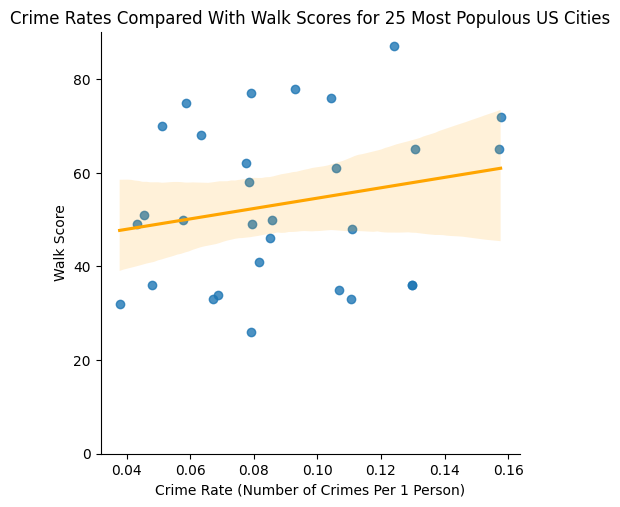

In [111]:
walk_scores_plot = sns.lmplot(x = "Rate of All Crimes", y = "Walk Score", data = walk_scores, line_kws={"color": "orange"})
walk_scores_plot.set(title = "Crime Rates Compared With Walk Scores for 25 Most Populous US Cities")
walk_scores_plot.set(xlabel = "Crime Rate (Number of Crimes Per 1 Person)")
plt.ylim(0, )